In [1]:
import pandas as pd
import numpy as np

In [2]:
### <변수설명>
# PassengerId : 각 승객의 고유 번호
# Survived : 생존 여부(종속 변수)
#     0 = 사망
#     1 = 생존
# Pclass : 객실 등급 - 승객의 사회적, 경제적 지위
#     1st = Upper(first class)
#     2nd = Middle(second class)
#     3rd = Lower(third class)
# Name : 이름
# Sex : 성별
# Age : 나이
# SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수
# Parch : 동반한 Parent(부모) Child(자식)의 수
# Ticket : 티켓의 고유넘버
# Fare : 티켓의 요금
# Cabin : 객실 번호
# Embarked : 승선한 항
#     C = Cherbourg
#     Q = Queenstown
#     S = Southampton

In [3]:
# 파일 불러오기
file_path = './data/06_(문제)타이타닉_분류_데이터셋.csv'
df = pd.read_csv(file_path)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
# 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [5]:
# 이상치 확인
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# 중복치는 있었으나
# 값이 중복되는 승객들이 
# 다른 승객이라는 것을 식별할 수 있는 특성이 없었기 때문에
# 따로 처리하지 않았습니다
df.duplicated().sum()

107

In [7]:
# 결측치가 너무 많은 deck 컬럼 삭제
# 요소가 중복되는 컬럼 alive, embarked, class는 삭제
# age 컬럼의 결측치는 who 컬럼의 각 범주별(man, woman, child) 평균값으로 대체
# embark_town은 결측치가 2개, 이전값으로 대체
# age는 연령대별로 필터링(0~9,10대,20대,30대,40대,50대,60대,70대,80대,90대이상)

In [8]:
# 필요한 컬럼만 불러오기
df_cut = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', \
    'fare', 'who', 'adult_male', 'embark_town', 'alone']]
df_cut

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,man,True,Southampton,True
887,1,1,female,19.0,0,0,30.0000,woman,False,Southampton,True
888,0,3,female,NaN,1,2,23.4500,woman,False,Southampton,False
889,1,1,male,26.0,0,0,30.0000,man,True,Cherbourg,True


In [9]:
# who 컬럼의 범주별 평균 계산
child_mean = round(df_cut.groupby('who')['age'].mean()[0])
man_mean = round(df_cut.groupby('who')['age'].mean()[1])
woman_mean = round(df_cut.groupby('who')['age'].mean()[2])
print(man_mean)

33


In [10]:
# age 컬럼 결측치 대체
man_index = df_cut[(df_cut['who'] == 'man') & (df_cut['age'].isnull())].index
woman_index = df_cut[(df_cut['who'] == 'woman') & (df_cut['age'].isnull())].index
child_index = df_cut[(df_cut['who'] == 'child') & (df_cut['age'].isnull())].index

for i in man_index:
    df_cut['age'][i] = man_mean
for i in woman_index:
    df_cut['age'][i] = woman_mean
for i in child_index:
    df_cut['age'][i] = child_mean

C:\Users\admin\AppData\Local\Temp\ipykernel_11196\2514576774.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut['age'][i] = man_mean
C:\Users\admin\AppData\Local\Temp\ipykernel_11196\2514576774.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut['age'][i] = woman_mean


In [11]:
# embark_town 결측치 대체
df_cut['embark_town'].fillna(method='ffill', inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_11196\1308952720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut['embark_town'].fillna(method='ffill', inplace=True)


In [12]:
# 연령대별 범주화
for i in range(len(df_cut)):
    if (df_cut.loc[i,'age'] > 0) & (df_cut.loc[i,'age'] <= 10) :
        df_cut.loc[i,'agee'] = '유아'
    elif (df_cut.loc[i,'age'] > 10) & (df_cut.loc[i,'age'] <= 20) :
        df_cut.loc[i,'agee'] = '10대'
    elif (df_cut.loc[i, 'age'] > 20) & (df_cut.loc[i,'age'] <= 30) :
        df_cut.loc[i, 'agee'] = '20대'
    elif (df_cut.loc[i,'age'] > 30) & (df_cut.loc[i,'age'] <= 40) :
        df_cut.loc[i, 'agee'] = '30대'
    elif (df_cut.loc[i,'age'] > 40) & (df_cut.loc[i, 'age'] <= 50) :
        df_cut.loc[i, 'agee'] = '40대'
    elif (df_cut.loc[i, 'age'] > 50) & (df_cut.loc[i, 'age'] <= 60) :
        df_cut.loc[i, 'agee'] = '50대'
    elif (df_cut.loc[i, 'age'] > 60) & (df_cut.loc[i, 'age'] <= 70) :
        df_cut.loc[i, 'agee'] = '60대'
    elif (df_cut.loc[i, 'age'] > 70) & (df_cut.loc[i, 'age'] <= 80) :
        df_cut.loc[i,'agee'] = '70대'
    elif (df_cut.loc[i,'age'] > 80) & (df_cut.loc[i, 'age'] <= 90) :
        df_cut.loc[i, 'agee'] = '80대'
    elif (df_cut.loc[i, 'age'] > 90) & (df_cut.loc[i,'age'] <= 100) :
        df_cut.loc[i, 'agee'] = '90대'

C:\Users\admin\AppData\Local\Temp\ipykernel_11196\3601974215.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut.loc[i, 'agee'] = '20대'


In [13]:
# who, embark_town, 연령대 컬럼 원핫인코딩
one_hot=df_cut[['who', 'embark_town','agee']]
one_hot = pd.get_dummies(one_hot)

In [14]:
# 원핫인코딩 후 필요없는 컬럼 삭제
# 기존 데이터프레임과 원핫인코딩한 데이터프레임 합치기
df_cut = df_cut.drop(['who', 'embark_town','agee'], axis = 1)
df_cut = pd.concat([df_cut,one_hot], axis = 1)

In [15]:
# sex, adult_male, alone 컬럼 1, 0 형태로 변환
for i in range(len(df_cut)):
    if df_cut.loc[i,'sex'] == 'male':
        df_cut.loc[i,'sex'] = 1
    else :
        df_cut.loc[i,'sex'] = 0

In [16]:
for i in range(len(df_cut)):
    if df_cut.loc[i,'adult_male'] == True:
        df_cut.loc[i,'adult_male'] = 1
    else :
        df_cut.loc[i,'adult_male'] = 0

In [17]:
for i in range(len(df_cut)):
    if df_cut.loc[i,'alone'] == True:
        df_cut.loc[i,'alone'] = 1
    else :
        df_cut.loc[i,'alone'] = 0

In [18]:
# 생존유무와 나머지 컬럼 분리
df_x = df_cut.iloc[:,1:]
df_y = df_cut['survived']

In [19]:
# 연속형 데이터 표준화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_x,df_y)
df_scaled = scaler.transform(df_x) 

In [20]:
# 표준화 데이터를 데이터프레임 형태로 확인
cdf=pd.DataFrame(data = df_scaled, columns = [ 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'adult_male', 'alone', 'who_child', 'who_man', 'who_woman',
       'embark_town_Cherbourg', 'embark_town_Queenstown',
       'embark_town_Southampton', 'agee_10대', 'agee_20대', 'agee_30대',
       'agee_40대', 'agee_50대', 'agee_60대', 'agee_70대', 'agee_유아'])

In [21]:
# 속성별 상관계수 확인을 위해서 종속변수 합치기
ccdf = pd.concat([cdf,df_y], axis =1 )

In [22]:
# 상관계수 절대값 확인
abs(ccdf.corr()['survived']).sort_values(ascending = False)

survived                   1.000000
adult_male                 0.557080
who_man                    0.557080
sex                        0.543351
who_woman                  0.506562
pclass                     0.338481
fare                       0.257307
alone                      0.203367
embark_town_Cherbourg      0.171485
embark_town_Southampton    0.155660
who_child                  0.136107
agee_유아                    0.120075
parch                      0.081629
age                        0.081577
agee_60대                   0.042599
sibsp                      0.035322
agee_30대                   0.030712
agee_70대                   0.028398
agee_20대                   0.022586
agee_50대                   0.009569
embark_town_Queenstown     0.008660
agee_10대                   0.000973
agee_40대                   0.000079
Name: survived, dtype: float64

In [23]:
# survived                   1.000000
# adult_male                 0.557080
# who_man                    0.557080
# sex                        0.543351
# who_woman                  0.506562
# pclass                     0.338481
# fare                       0.257307
# alone                      0.203367

In [24]:
df_scaled

array([[1.        , 1.        , 0.27117366, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.4722292 , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.32143755, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.39683338, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.32143755, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.39683338, ..., 0.        , 0.        ,
        0.        ]])

In [25]:
df_target = df_y.to_numpy()
df_target

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_input, test_input, train_target, test_target = \
train_test_split(df_scaled, df_target, random_state=42)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf = RandomForestClassifier(max_depth = 3, n_jobs=-1, random_state = 42)

In [30]:
rf.fit(train_input, train_target)

RandomForestClassifier(max_depth=3, n_jobs=-1, random_state=42)

In [31]:
print(rf.score(train_input, train_target))
print(rf.score(test_input, test_target))

0.8173652694610778
0.8116591928251121


In [32]:
from sklearn.model_selection import GridSearchCV

# 찾을 하이퍼파라미터는 딕셔너리로
# 실제 파라미터 변수이름 그대로, 찾을 범위 지정
params = {'max_depth' : range(1, 20, 1)}

# 객체(모델) 생성
# - 첫번째 값 : 훈련모델 넣기
# - 두번째 값 : 찾을 하이퍼파라메터 값들
# - 세번째 값 : CPU 코어 갯수 (-1은 모든 코어 사용, 병렬 처리)
gs = GridSearchCV(RandomForestClassifier(random_state=42),
                 params, n_jobs = -1)

gs.fit(train_input, train_target)

GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 20)})

In [33]:
gs.best_estimator_

RandomForestClassifier(max_depth=7, random_state=42)

In [34]:
print(gs.score(train_input, train_target))
print(gs.score(test_input, test_target))

0.8922155688622755
0.8161434977578476


In [35]:
from sklearn.model_selection import StratifiedKFold

In [36]:
### 10-폴드 지정하기
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# min_impurity_decrease : 결정트리 노드 분리시 불순도 감소 최소량
# max_depth : 결정트리 깊이
# min_samples_split : 결정트리 노드를 나누기 위한 최소 샘플 갯수
params = {'n_estimators' : range(10, 200, 10), \
          'max_depth' : range(1, 20, 1)}

### 그리드서치 훈련시키기
# 찾을 파라미터의 범위 별로 교차검증 진행 : 엄청 많이 수행됨
gs = GridSearchCV(RandomForestClassifier(random_state=42),
                 params, cv=splitter, n_jobs = -1)
gs.fit(train_input, train_target)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 20),
                         'n_estimators': range(10, 200, 10)})

In [37]:
gs.best_estimator_

RandomForestClassifier(max_depth=4, n_estimators=20, random_state=42)

In [38]:
print(gs.score(train_input, train_target))
print(gs.score(test_input, test_target))

0.842814371257485
0.8161434977578476


In [39]:
# 0.8922155688622755
# 0.8161434977578476

# 0.842814371257485
# 0.8161434977578476

In [40]:
gs.predict(df_scaled)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [41]:
proba = gs.predict_proba(df_scaled)
proba

array([[0.89656027, 0.10343973],
       [0.07482993, 0.92517007],
       [0.40236015, 0.59763985],
       ...,
       [0.47863247, 0.52136753],
       [0.66629095, 0.33370905],
       [0.86177213, 0.13822787]])

In [42]:
proba_1 = []

for i in range(len(proba)):
    proba_1.append(proba[i][1])
    
proba_1

[0.1034397347406042,
 0.9251700693108151,
 0.5976398493440696,
 0.8939541407981568,
 0.1117154996970868,
 0.10758709085936775,
 0.28302490989252815,
 0.428377320913295,
 0.6004076344046037,
 0.7662734591337148,
 0.599540038084827,
 0.8782441068610218,
 0.12755325371747755,
 0.11108930342373473,
 0.4560640948778385,
 0.8808756858083904,
 0.31341635215695907,
 0.1615602489285247,
 0.5775650126937827,
 0.7049879574292214,
 0.1615602489285247,
 0.1615602489285247,
 0.5803545614631966,
 0.264783516561002,
 0.39623241960195144,
 0.43881771394610497,
 0.12292834798696459,
 0.2368738846977198,
 0.6855901661939687,
 0.1117154996970868,
 0.3211081725618289,
 0.9251700693108151,
 0.6855901661939687,
 0.20635972436622413,
 0.3762144943741216,
 0.29187465358919673,
 0.12292834798696459,
 0.12459338749674176,
 0.566799265788495,
 0.6286456128262607,
 0.4986682963453896,
 0.8510375486834668,
 0.12696332480955203,
 0.8650019680177735,
 0.5800783982814743,
 0.1117154996970868,
 0.12524016365634558,
 0.

In [43]:
train_input, test_input, train_target, test_target = \
train_test_split(df_scaled, proba_1, random_state=42)

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
rfr = RandomForestRegressor(max_depth=5, n_estimators=20, random_state=42)
rfr.fit(train_input, train_target)

RandomForestRegressor(max_depth=5, n_estimators=20, random_state=42)

In [55]:
print(rfr.score(train_input, train_target))
print(rfr.score(test_input, test_target))

0.9949543587937748
0.9927268545414153


In [152]:
val = np.round(rfr.feature_importances_, 3)
val

array([0.151, 0.002, 0.002, 0.001, 0.   , 0.035, 0.359, 0.   , 0.001,
       0.439, 0.   , 0.003, 0.   , 0.005, 0.002, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   ])

In [161]:
col = cdf.columns[0:-1].sort_values()
col

Index(['adult_male', 'age', 'agee_10대', 'agee_20대', 'agee_30대', 'agee_40대',
       'agee_50대', 'agee_60대', 'agee_70대', 'agee_유아', 'alone',
       'embark_town_Cherbourg', 'embark_town_Queenstown',
       'embark_town_Southampton', 'fare', 'parch', 'pclass', 'sex', 'sibsp',
       'who_child', 'who_man', 'who_woman'],
      dtype='object')

In [162]:
abc = pd.DataFrame(val, index=col).T
abc['who_woman']

0    0.0
Name: who_woman, dtype: float64

In [163]:
cdf['proba'] = proba_1
cdf.corr()

,pclass,sex,age,sibsp,parch,fare,adult_male,alone,who_child,who_man,...,embark_town_Southampton,agee_10대,agee_20대,agee_30대,agee_40대,agee_50대,agee_60대,agee_70대,agee_유아,proba
pclass,1.000000,0.131900,-0.314162,0.083081,0.018443,-0.549500,0.094035,0.135207,0.121920,0.094035,...,0.081720,0.102180,0.055285,0.048700,-0.152566,-0.208905,-0.130057,-0.045728,0.110523,-0.426619
sex,0.131900,1.000000,0.095538,-0.114631,-0.245489,-0.182333,0.908578,0.303646,-0.111141,0.908578,...,0.125722,-0.038347,0.000295,0.043737,-0.005509,0.008883,0.051365,0.055417,-0.076844,-0.874528
age,-0.314162,0.095538,1.000000,-0.231518,-0.190806,0.081282,0.267799,0.195308,-0.587549,0.267799,...,-0.046964,-0.382797,-0.220174,0.206836,0.377574,0.419185,0.358908,0.247530,-0.554762,-0.083828
sibsp,0.083081,-0.114631,-0.231518,1.000000,0.414838,0.159651,-0.253586,-0.584471,0.352437,-0.253586,...,0.070941,0.023855,-0.107723,-0.032938,-0.044756,-0.043083,-0.043852,-0.035649,0.333369,0.066670
parch,0.018443,-0.245489,-0.190806,0.414838,1.000000,0.216225,-0.349943,-0.583398,0.351481,-0.349943,...,0.063036,0.004640,-0.104314,-0.097072,0.019734,-0.019898,-0.004960,-0.035583,0.359225,0.216259
fare,-0.549500,-0.182333,0.081282,0.159651,0.216225,1.000000,-0.182024,-0.271832,0.003753,-0.182024,...,-0.166603,-0.020732,-0.046291,-0.008545,0.058960,0.056295,0.038490,-0.009480,-0.009913,0.346840
adult_male,0.094035,0.908578,0.267799,-0.253586,-0.349943,-0.182024,1.000000,0.404744,-0.394747,1.000000,...,0.112035,-0.050005,0.054405,0.113401,0.024608,0.029077,0.062940,0.060993,-0.342628,-0.893965
alone,0.135207,0.303646,0.195308,-0.584471,-0.583398,-0.271832,0.404744,1.000000,-0.347400,0.404744,...,0.024929,-0.029482,0.096334,0.118144,-0.045293,-0.003389,0.046175,0.060993,-0.333745,-0.353106
who_child,0.121920,-0.111141,-0.587549,0.352437,0.351481,0.003753,-0.394747,-0.347400,1.000000,-0.394747,...,0.000077,0.095448,-0.189059,-0.247000,-0.104757,-0.071286,-0.044699,-0.024077,0.867968,0.199598
who_man,0.094035,0.908578,0.267799,-0.253586,-0.349943,-0.182024,1.000000,0.404744,-0.394747,1.000000,...,0.112035,-0.050005,0.054405,0.113401,0.024608,0.029077,0.062940,0.060993,-0.342628,-0.893965


In [164]:
import matplotlib.pyplot as plt

In [ ]:
# ['pclass'], ['sex'], ['sibsp'], ['parch'], ['fare'], ['adult_male'], ['alone']
# ['who_child', 'who_man', 'who_woman'] , 
# ['embark_town_Cherbourg', 'embark_town_Queenstown', 'embark_town_Southampton']
# ['agee_10대', 'agee_20대', 'agee_30대', 'agee_40대', 'agee_50대', 'agee_60대', 'agee_70대', 'agee_유아']

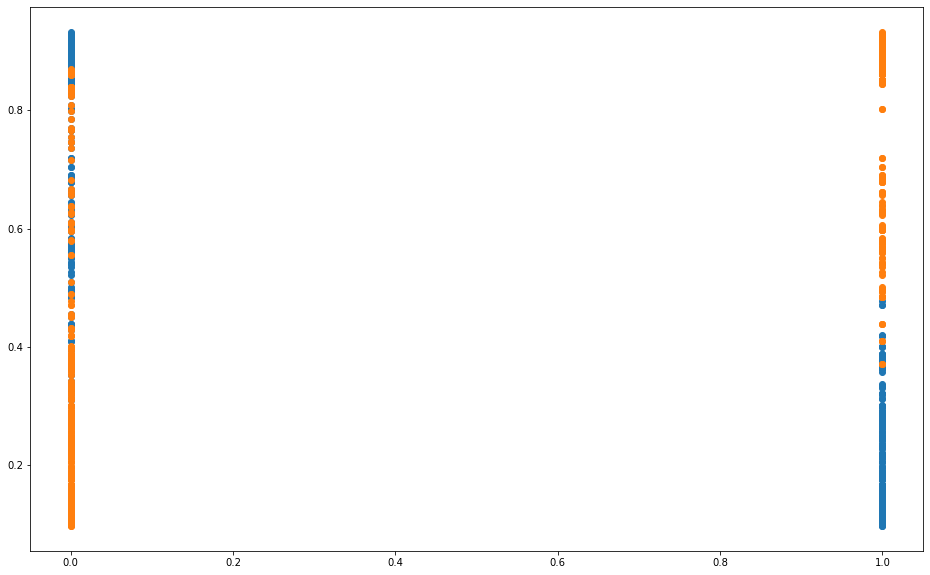

In [111]:
plt.figure(figsize=(16,10))

# plt.scatter(cdf['pclass'], proba_1)
# plt.scatter(cdf['sex'], proba_1)
# plt.scatter(cdf['sibsp'], proba_1)
# plt.scatter(cdf['parch'], proba_1)
# plt.scatter(cdf['fare'], proba_1,marker='^')
# plt.scatter(cdf['adult_male'], proba_1)
# plt.scatter(cdf['alone'], proba_1)

# plt.scatter(cdf['who_man'], proba_1)
# plt.scatter(cdf['who_woman'], proba_1)
# plt.scatter(cdf['who_child'], proba_1)



plt.show()

In [122]:
cdf.sort_values(by = 'proba', ascending = False).head(10)

,pclass,sex,age,sibsp,parch,fare,adult_male,alone,who_child,who_man,...,embark_town_Southampton,agee_10대,agee_20대,agee_30대,agee_40대,agee_50대,agee_60대,agee_70대,agee_유아,proba
412,0.0,0.0,0.409399,0.125,0.000000,0.175668,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.932535
61,0.0,0.0,0.472229,0.000,0.000000,0.156150,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.929074
716,0.0,0.0,0.472229,0.000,0.000000,0.444099,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.929074
581,0.0,0.0,0.484795,0.125,0.166667,0.216430,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.925170
31,0.0,0.0,0.396833,0.125,0.000000,0.285990,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.925170
1,0.0,0.0,0.472229,0.125,0.000000,0.139136,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.925170
835,0.0,0.0,0.484795,0.125,0.166667,0.162314,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.925170
319,0.0,0.0,0.497361,0.125,0.166667,0.262527,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.925170
215,0.0,0.0,0.384267,0.125,0.000000,0.221098,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.925170
849,0.0,0.0,0.396833,0.125,0.000000,0.173920,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.925170


In [123]:
df.iloc[[412,61,716,581,31,1,835,319,215,849]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
412,1,1,female,33.0,1,0,90.0000,Q,First,woman,False,C,Queenstown,yes,False
61,1,1,female,38.0,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True
716,1,1,female,38.0,0,0,227.5250,C,First,woman,False,C,Cherbourg,yes,True
581,1,1,female,39.0,1,1,110.8833,C,First,woman,False,C,Cherbourg,yes,False
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
835,1,1,female,39.0,1,1,83.1583,C,First,woman,False,E,Cherbourg,yes,False
319,1,1,female,40.0,1,1,134.5000,C,First,woman,False,E,Cherbourg,yes,False
215,1,1,female,31.0,1,0,113.2750,C,First,woman,False,D,Cherbourg,yes,False
849,1,1,female,NaN,1,0,89.1042,C,First,woman,False,C,Cherbourg,yes,False


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [ ]:
# survived                1
# pclass                  1
# sex                female
# age                  33.0
# sibsp                   1
# parch                   0
# fare                 90.0
# embarked                Q
# class               First
# who                 woman
# adult_male          False
# deck                    C
# embark_town    Queenstown
# alive                 yes
# alone               False

In [ ]:
### 해석

## 전처리
# 결측치가 너무 많은 deck 컬럼 삭제
# 요소가 중복되는 컬럼 alive, embarked, class는 삭제
# age 컬럼의 결측치는 who 컬럼의 각 범주별(man, woman, child) 평균값으로 대체
# embark_town은 결측치가 2개, 이전값으로 대체
# age는 연령대별로 필터링(0~9,10대,20대,30대,40대,50대,60대,70대,80대,90대이상)
# 범주로 되어 있는 컬럼 원핫인코딩

## 머신러닝
# 랜덤포레스트 모델 (max_depth = 3)
# 0.8173652694610778
# 0.8116591928251121

# 그리드서치 이용 (max_depth = 7)
# 0.8922155688622755
# 0.8161434977578476

# 그리드서치 이용 (max_depth=4, n_estimators=20)
# 0.842814371257485
# 0.8161434977578476

# 그리드서치를 이용해서 찾은 모델로 데이터 전체 입력해서 예측하고
# predict_proba를 이용해서 살아남을 확률 추출

# 추출한 살아남을 확률을 새로운 종속변수로 지정

# 랜덤포레스트 회귀모델을 이용하여 머신러닝
# 0.9949543587937748
# 0.9927268545414153
# 정확도가 매우 높은 우수한 모델입니다

# 생존 확률이 높은 순서대로 정렬하여 특성 확인
# 1등실, 여성, 30대, 동행인1명 이상, Cherbourg에서 승선
# 위 속성을 가진 경우 생존율이 높았음